In [1]:
import pandas as pd
df = pd.read_pickle("../data/training_df")

In [2]:
df.head()

,cr,feat_03_syn,feat_04_syn,feat_10_syn,feat_12_syn,feat_13_syn,feat_15_syn,feat_20_syn,feat_24_syn,feat_26_syn,...,feat_11_mm,feat_16_mm,feat_17_mm,feat_21_mm,feat_22_mm,feat_23_mm,feat_30_mm,feat_33_mm,feat_34_mm,feat_41_mm
0,0.818182,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.008475,0.000000,0.009756,0.0,0.000000,0.000000,0.000000
1,0.755102,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.012712,0.000000,0.014634,0.0,0.000000,0.000000,0.000000
2,0.257576,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.055085,0.044776,0.039024,0.0,0.000000,0.000000,0.000000
3,0.381818,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.029661,0.014925,0.024390,0.0,0.009524,0.010417,0.007407
4,0.870968,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.007407,0.025424,0.000000,0.019512,0.0,0.000000,0.000000,0.000000


In [4]:
import joblib

In [5]:
model = joblib.load('../models/rf_model_d13.joblib')

C:\Users\ARosa\Miniconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\ARosa\Miniconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


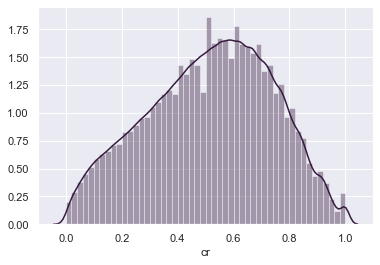

In [6]:
import seaborn as sns
sns.set(style="darkgrid", palette="rocket")
sns.distplot(df.cr)

In [7]:
sum(df.cr < 0.60)

629663

In [8]:
sum(df.cr > 0.60)

395050

In [9]:
import numpy as np
thres = np.unique([j for i in model.estimators_ for j in i.tree_.threshold])
np.sort(thres)[-10:]

array([0.97457629, 0.97669494, 0.97881356, 0.98093221, 0.98175183,
       0.98292685, 0.98305085, 0.98516947, 0.98780489, 0.99512196])

In [10]:
np.sort(thres)[-20:]

array([0.94703388, 0.94890511, 0.95255476, 0.95550847, 0.95620438,
       0.95762712, 0.95974576, 0.96398303, 0.97245765, 0.97445256,
       0.97457629, 0.97669494, 0.97881356, 0.98093221, 0.98175183,
       0.98292685, 0.98305085, 0.98516947, 0.98780489, 0.99512196])

In [11]:
np.sort(thres)[-70:]

array([0.72727272, 0.72727275, 0.73333335, 0.73516949, 0.73636365,
       0.73809525, 0.74152543, 0.74364407, 0.74545455, 0.75      ,
       0.75211862, 0.75238097, 0.75454548, 0.75806451, 0.76363638,
       0.76666668, 0.7682927 , 0.77272728, 0.78095239, 0.78181818,
       0.78292683, 0.78645834, 0.78832117, 0.79024389, 0.79025424,
       0.79090911, 0.79512194, 0.79523811, 0.80291972, 0.81428573,
       0.81770834, 0.82846716, 0.83576643, 0.86341465, 0.86363637,
       0.86666667, 0.88321167, 0.89406779, 0.8941606 , 0.89512196,
       0.90243903, 0.90731707, 0.90875912, 0.90889832, 0.91101697,
       0.91313562, 0.91605839, 0.92335767, 0.93430656, 0.93658537,
       0.94703388, 0.94890511, 0.95255476, 0.95550847, 0.95620438,
       0.95762712, 0.95974576, 0.96398303, 0.97245765, 0.97445256,
       0.97457629, 0.97669494, 0.97881356, 0.98093221, 0.98175183,
       0.98292685, 0.98305085, 0.98516947, 0.98780489, 0.99512196])

The model is capable of classifying better or with more detail low completion rate forms rather than high completion rate forms by analyzing these thresholds.

In [12]:
model.estimators_[0].tree_.max_depth

13

In [16]:
feats = df.columns[1:]

In [18]:
feats[1][5:7]

'04'

In [19]:
short_names = ["f"+x[5:7] for x in feats]
short_names

['f03',
 'f04',
 'f10',
 'f12',
 'f13',
 'f15',
 'f20',
 'f24',
 'f26',
 'f27',
 'f35',
 'f37',
 'f44',
 'f02',
 'f06',
 'f07',
 'f08',
 'f09',
 'f11',
 'f16',
 'f17',
 'f21',
 'f22',
 'f23',
 'f30',
 'f33',
 'f34',
 'f41']

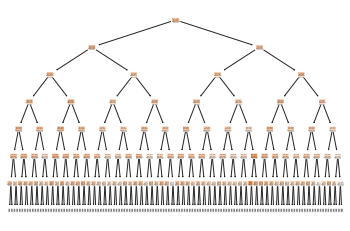

In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree 
plt.figure()
# showing first 6 levels of the tree
_ = plot_tree(model.estimators_[0], feature_names=short_names, filled=True, proportion=True, rounded=True, max_depth=6)
plt.savefig('../data/first_6_levels.eps',format='eps',bbox_inches = "tight")

With EPS Viewer you can scale the image and explore the details of the image. 